In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn 
from sklearn.datasets import load_boston

In [ ]:
data = load_boston()

- CRIM 住房所在城鎮的人均犯罪率
- ZN 住房用地超過 25,000 平方尺的比例
- INDUS 住房所在城鎮非零售商用土地的比例
- CHAS 有關查理斯河的虛擬變數(如果住房位於河邊則為 1，否則為 0)
- NOX 一氧化氮濃度
- RM 每處住房的平均房間數
- AGE 建於 1940 年之前的業主自住房比例
- DIS 住房距離波士頓五大中心區域的加權距離
- RAD 距離住房最近的公路入口編號
- TAX 每 10,000 美元的全額財產稅金額
- PTRATIO 住房所在城鎮的師生比例
- B 1000(Bk-0.63)^2，其中 Bk 指代城鎮中黑人的比例
- LSTAT 弱勢群體人口所占比例
- MEDV 業主自住房的中位數房價(以千美元計)

In [ ]:
data_df = pd.DataFrame(data=data.data,columns=data.feature_names)
data_df["MEDV"] = data.target
data_df

In [ ]:
data_df.describe()
# 可以稍微檢查一下 類別型有沒有異常
# 百分比率 有沒有不合理
# 資料筆數是否相同

##### 檢查有無缺失值

In [ ]:
data_df.isnull().any()

In [ ]:
# to_numeric 將一列或多列轉為數值最佳方法，會嘗試將字串改為整數浮點，若不能轉換則為NAN
# astype 強行轉換
# infer_objects 推論轉換
data_df.dtypes

In [ ]:
sns.distplot(data.target)
plt.show()

In [ ]:
# regplot()：根據資料繪製線性迴歸(Linear Regression)模型圖
# 透過簡單線性回歸可看出 平數 與 房價 呈現正相關
sns.regplot(x=data_df["RM"], y=data_df["MEDV"])


In [ ]:
#透過皮爾森映射熱力圖看出哪些特徵與目標變數有較高的相關性。

sns.set(rc={"figure.figsize":(10,5)})
sns.heatmap(data=data_df.corr(),cmap="RdBu", #cmap="Greens"
 annot_kws={"size":12},
 annot=True,
 fmt=".2f")


元迴歸分析造成下列的不良影響：
1. 膨脹最小平方法（least squares）估計參數值的變異數和共變數，使得迴歸係數的
估計值變得很不精確。
2. 膨脹迴歸係數估計值的相關係數。
3. 膨脹預測值的變異數，但對預測能力不影響。
4. 造成解釋迴歸係數及其信賴區間估計之困難。
5. 造成整體模式的考驗達顯著，但各別迴歸係數之考驗不顯著的矛盾現象和解釋上
之困擾。
6. 造成迴歸係數的正負號與所期望者相反的衝突現象，這是由於自變項間之壓抑效
果（suppress effect）造成的。
一個比較簡單的診斷方法是察看自變項間的相關係數矩陣，看看該矩陣中是否
有元素值（即自變項兩兩之間的相關係數值）是大於.90 以上者，若有，即表示該二
變項互為「多元共線性變項」，並認為該迴歸分析中有嚴重的多元共線性問題存在。
另一個比較正式、客觀的診斷法，則為使用第 j 個自變項的「變異數膨脹因數」
（variance inflation factor）作為判斷的指標，凡變異數膨脹因數指標值大於 10 者，
即表示第 j 個自變項是一個多元共線性變項。
在一般的迴歸分析中，針對這種多元共線性問題，有些統計學家會建議將多元
共線性變項予以刪除，不納入迴歸方程式中。但避免多元共線性問題所造成困擾的
最佳解決方法，不是刪除該具有多元共線性變項，而是使用所謂的「偏差迴歸分析」
（biased regression analysis, BRA）。其中以「山脊型迴歸」（ridge regression）最受到
學者們的重視和使用；除此之外，尚有「主成分迴歸」（principal component
regression）、「潛在根迴歸」（latent root regression）、「貝氏法迴歸」（Baysean
regression）、「遞縮式迴歸」（shrinkage regression）等，不過這些偏差迴歸分析法所獲
得的迴歸係數值都是「有偏差的」（biased），亦即這些迴歸係數的期望值不等於母群
體的迴歸係數值，所以稱作偏差迴歸係數估計值，而本補救多元共線性問題的方法
即稱作偏差迴歸分析法。


In [ ]:
x = data_df.drop("MEDV",axis=1)
y = data_df["MEDV"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)


In [ ]:
np.set_printoptions(precision=3, suppress=True)
reg = LinearRegression()
reg.fit(x_train,y_train)
coef_df = pd.DataFrame(columns=x_train.columns,data=reg.coef_.reshape(1,13))
predict = pd.DataFrame(reg.predict(x_test))
print("訓練集score",reg.score(x_train,y_train))
print("測試集score",reg.score(x_test,y_test)) 
# score 會把x_test拿去predict，之後再與y_test進行r2計算，與統計模型的r2_score一樣
# 只是r2_score需要傳入predict的結果
print("w權重",reg.coef_)
coef_df

# 可以看出RM對於房價的影響是比較高的
# 負相關的部分可以思考一下為什麼，例如NOX(一氧化碳農度)可以看出對於房價是負影響，可能工業區或嚴重汙染地區


如果預測房價和實際房價一致的話，那麼所有的資料點都應該彙
集在 y = x 這條線上，但這並不是現實，於是可以看到，除了少數點，大部分點散落在 y = x
附近，大趨勢說明預測的結果還不錯。


In [ ]:
plt.scatter(y_test,predict)
plt.ylabel("predic price")
plt.xlabel("real price")
x = np.arange(0, 50)
y = x
plt.plot(x, y, color="red", lw=4)

In [ ]:
predict = pd.Series(predict)
#重新設定 index
y_test.reset_index(inplace=True, drop=True)
predict.reset_index(inplace=True, drop=True)
draw_data = pd.concat([y_test,predict],axis=1)
draw_data.columns = ["實際房價","預測房價"]
#用於正常顯示中文，Apple Mac 可選用 Arial
plt.rcParams["font.sans-serif"] = "Microsoft JhengHei"
#用於正常顯示符號
plt.rcParams["axes.unicode_minus"] = False
sns.lmplot(x="實際房價", y="預測房價",
 data=draw_data,
 height=6,
 aspect=1.2,
 ci=95)

量化評估指標
###
但依經驗歸納如下：R2的
值大於 0.75，表示迴歸模型擬合度很好，迴歸方程的可解釋程度較高，即迴歸方程的精度較
高。R2 的值在 0.5 和 0.75 之間，表示迴歸模型的擬合可以接受，但需要進一步修正迴歸模型。
R2 的值小於 0.5，表示迴歸模型擬合有問題，

In [ ]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test,predict)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predict))
r2 = metrics.r2_score(y_test, predict)
print(mse)
print(rmse)
print(r2)


=====================================================================================================================================

### 訓練完準確度不高怎麼辦

為甚麼「訓練模型的正確率」這麼低呢（正確率：0.7645451026942549）？
因為線性迴歸的的方程式為一條直線，當特徵與房價不成線性關係的話，那麼再怎麼分析，正確率都不會高。
解決的方法有：(1).只討論呈線性關係的特徵、(2).使用多項式迴歸、(3).降維。


### (一) 以特徵重要性訓練模型

In [ ]:

boston_house = load_boston()
boston_house_df = pd.DataFrame(data=boston_house.data,columns=boston_house.feature_names)
boston_house_price = boston_house.target


前述分析是直接使用所有的 13 個特徵，如果可以只選取比較重要的特徵出來分析？特別注意到如果要找尋重要性的話，一定要先做標準化，不然數據
跑出來的結果會整個失真。

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler() # Z-scaler 物件
X_scaled = scale.fit_transform(boston_house_df)
X_scaled_df = pd.DataFrame(X_scaled,columns=boston_house_df.keys())
X_scaled_df

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
LR_model = LinearRegression()
LR_model.fit(X_scaled, boston_house_price)
feature_importance = LR_model.coef_ #重要性
plt.figure(figsize=(8,6)) #圖形大小
plt.bar(X_scaled_df.columns, feature_importance) #繪製成直方圖
plt.show() 

基本上數值（取絕對值後）越大代表越重要。因此嘗試將 CRIM、INDUS、CHAS、AGE、
B 刪除，只使用 ZN、NOX、RM、DIS、RAD、TAX、PTRATIO、LSTAT 再做一次線性迴歸，
來預測房價。

In [ ]:
x = boston_house_df.drop(["CRIM","INDUS","CHAS","AGE","B"],axis=1)
y = boston_house_price
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
train_score = model.score(x_train, y_train)
print(f"訓練模型的正確率：{train_score}")
print(f"測試模型的正確率：{model.score(x_test,y_test)}")
print("="*45)
# #評估模型
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)
print("1.均方誤差(MSE) =", mse)
print("2.均方根誤差(RMSE) =", rmse)
print("3.判定係數(R^2）=", r2)
# 以比較重要的特徵下去跑，在這樣的資料下 看起來並沒有比較高

### (二) PCA 降維

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
boston_house = load_boston()
x = pd.DataFrame(data=boston_house.data,columns=boston_house.feature_names)
y = boston_house.target


In [ ]:

x_train, x_test, y_train, y_test = \
 train_test_split(x, y,
 test_size=0.3,
 random_state=0) #4

In [ ]:

# Standarize our training data
std_tool = StandardScaler()
std_tool.fit(x_train)
x_train = std_tool.transform(x_train)
# PC 降維
pca = decomposition.PCA(n_components=0.95)
pca.fit(x_train)
x_train = pca.transform(x_train)


import matplotlib.pyplot as plt
%matplotlib inline
lr_model = LinearRegression()
lr_model.fit(x_train, y_train) #將資料拿去訓練
# Standarize x_test
x_test = std_tool.transform(x_test)
# Dimension reduction usng PCA
x_test = pca.transform(x_test)
#將 test 的資料用訓練出來的模型去預測
y_predict = lr_model.predict(x_test)
plt.figure(figsize=(8,6))
plt.xlabel("Actual price") #X 軸的標題
plt.ylabel("Predict pcice") #Y 軸的標題
plt.plot([0,50], [0,50]) #劃一條基準線
plt.scatter(y_test, y_predict) #比對預測跟實際的差
print("train",lr_model.score(x_train, y_train))
print("test",lr_model.score(x_test, y_test))

### (三) 多項式

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
boston_house = load_boston()
x = pd.DataFrame(data=boston_house.data,columns=boston_house.feature_names)
y = boston_house.target

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3,random_state=0) 



In [ ]:
model=make_pipeline(PolynomialFeatures(2),LinearRegression())
model.fit(x_train,y_train)
print("train",model.score(x_train,y_train))
print("test",model.score(x_test,y_test))


SVM
#### 主要優點：
1. 解決高維特徵的分類問題和回歸問題很有效,在特徵維度大於樣本數時依然有很好的效
果。
2. 僅僅使用一部分支援向量來做超平面的決策，無需依賴全部資料。
3. 有大量的核函數可以使用，從而可以很靈活的來解決各種非線性的分類回歸問題。
4. 樣本量不是海量資料的時候，分類準確率高，泛化能力強。
#### 主要缺點：
1. 如果特徵維度遠遠大於樣本數，則 SVM 表現一般。
2. SVM 在樣本量非常大，核函數映射維度非常高時，計算量過大，不太適合使用。
3. 非線性問題的核函數的選

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

boston_house = load_boston()

In [23]:
train_x, test_x, train_y, test_y = \
 train_test_split(x, y,
 test_size=0.30,
 random_state=0) 

In [24]:
# 無標準化
boston_svr = SVR()
boston_svr.fit(train_x, train_y)
print("train",boston_svr.score(train_x,train_y))
print("test",boston_svr.score(test_x,test_y))

train 0.21624037461916024
test 0.1811277097860169


In [35]:
# 有標準化
ss_x = StandardScaler()
train_x = ss_x.fit_transform(train_x)
test_x = ss_x.transform(test_x)
boston_svr = SVR()
boston_svr.fit(train_x, train_y)
print("train",boston_svr.score(train_x,train_y))
print("test",boston_svr.score(test_x,test_y))
boston_svr_test_y_predict = boston_svr.predict(test_x)
# len(boston_svr_test_y_predict)
# len(test_y)

train 0.697983498558084
test 0.5543454037359106


152

c:\Users\adamw\OneDrive\桌面\VirtualEnv\v01\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25151 (\N{CJK UNIFIED IDEOGRAPH-623F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\adamw\OneDrive\桌面\VirtualEnv\v01\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\adamw\OneDrive\桌面\VirtualEnv\v01\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\adamw\OneDrive\桌面\VirtualEnv\v01\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23526 (\N{CJK UNIFIED IDEOGRAPH-5BE6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\adamw\OneDrive\桌面\VirtualEnv\v01\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20540 (\N{CJK

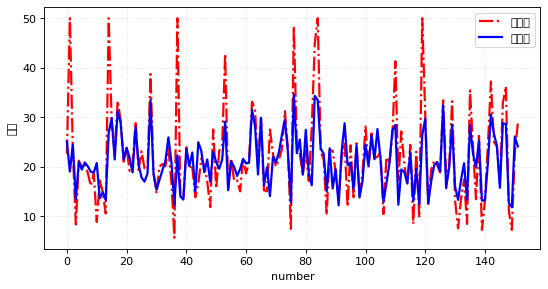

In [39]:

plt.figure(figsize=(8, 4), dpi=80)
plt.plot(range(len(test_y)),
 test_y,
 ls="-.",
 lw=2,
 c="r",
 label="真實值")
plt.plot(range(len(boston_svr.predict(test_x))),
 boston_svr.predict(test_x),
 ls="-",
 lw=2,
 c="b",
 label="預測值")
#繪製網格
plt.grid(alpha=0.4, linestyle=":")
plt.legend()
plt.xlabel("number") #設置 x 軸的標籤文本
plt.ylabel("房價") #設置 y 軸的標籤文本
plt.show() #顯示圖形
#透過圖形可以直觀的看出，預測值和真實值還是有很大差距的
